<a href="https://colab.research.google.com/github/puzlike/expert-octo-telegram/blob/main/Dice_chip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,チップ数,1回目,2回目,3回目,4回目,5回目,6回目,7回目,8回目,9回目,...,141回目,142回目,143回目,144回目,145回目,146回目,147回目,148回目,149回目,150回目
1,7,8,8,9,9,9,10,9,9,8,...,7,7,7,6,6,6,7,7,7,6
2,2,2,2,2,1,1,1,2,2,2,...,7,7,7,7,8,9,8,8,8,8
3,5,5,4,4,4,4,4,4,5,5,...,3,3,3,3,3,3,3,3,3,3
4,4,3,3,3,4,3,2,2,2,2,...,9,8,9,9,8,8,8,7,8,8
5,6,6,7,6,6,6,6,6,5,6,...,3,3,2,3,3,2,2,2,1,2
6,6,6,6,6,6,7,7,7,7,7,...,1,2,2,2,2,2,2,3,3,3


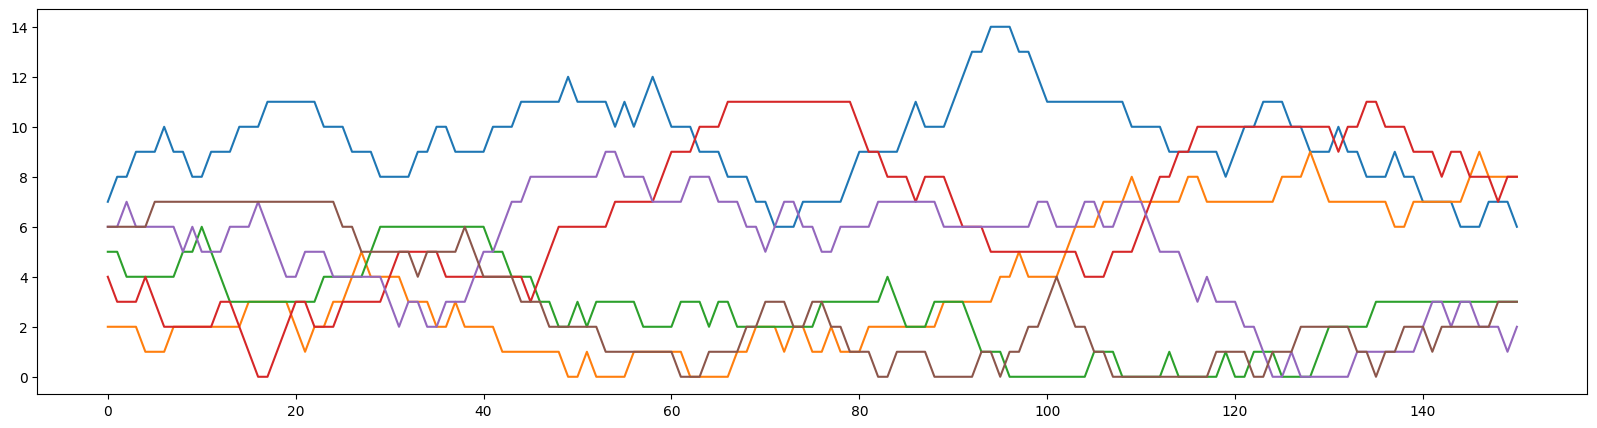

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

chips = [0 for n in range(6)]

for i in range(30):
    n = random.randint(1, 6)
    chips[n - 1] += 1

data = []
data_list = []
for i in range(6):
    data_list.append(i + 1)
    data.append([chips[i]])

df = pd.DataFrame(data, index=data_list, columns=['チップ数'])

for i in range(150):
    while True:
        n1 = random.randint(1, 6)
        if chips[n1 - 1] != 0:
            break
    chips[n1 - 1] -= 1
    while True:
        n2 = random.randint(1, 6)
        if n2 != n1:
            break
    chips[n2 - 1] += 1
    chip = pd.Series(np.array(chips), name=f'{i + 1}回目')
    chip.index = chip.index + 1
    df = pd.concat([df, chip], axis=1)
display(df)
x = range(0, 151)
y = []
plt.figure(figsize=(20, 5))
for i in range(6):
    y.append(list(df.iloc[i]))
    plt.plot(x, y[i])
